In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

## Understand the data

In [3]:
# Import data
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
df.shape

(70692, 22)

In [5]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [7]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
# are there null values (no)
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Data Preperation

* Drop irrelevant columns and rows
* Identify duplicated columns
* Renaming columns if necessary
* feature creation

In [9]:
# decide which columns you want to keep
# start off with a few columns then you can always add afterwards to make better predictions
# I picked columns based on what will have the most affect on predicting diabetes based off my research expertise

old_columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
new_columns =['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker','PhysActivity',
              'Fruits','GenHlth','PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
df = df[new_columns].copy()

In [10]:
# Check if any of the rows are duplicated
df.loc[df.duplicated()]

# for the parameters chosen, it is possible to have patients with similar stats especially since some columns are ranges

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
360,0.0,0.0,0.0,28.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,6.0,6.0,8.0
474,0.0,0.0,0.0,21.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,5.0,2.0
602,0.0,0.0,0.0,22.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,6.0,6.0,8.0
689,0.0,0.0,0.0,26.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,6.0,6.0,8.0
891,0.0,0.0,0.0,24.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,6.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70332,1.0,1.0,0.0,32.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,9.0,6.0,8.0
70465,1.0,1.0,0.0,40.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,7.0,6.0,8.0
70472,1.0,1.0,1.0,34.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,6.0,6.0,8.0
70591,1.0,1.0,1.0,30.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,10.0,6.0,8.0


## Understanding Features

* Univariate analysis
* Histograms
* KDEs, Boxplots
* Bivariate analysis

### Univariate analysis

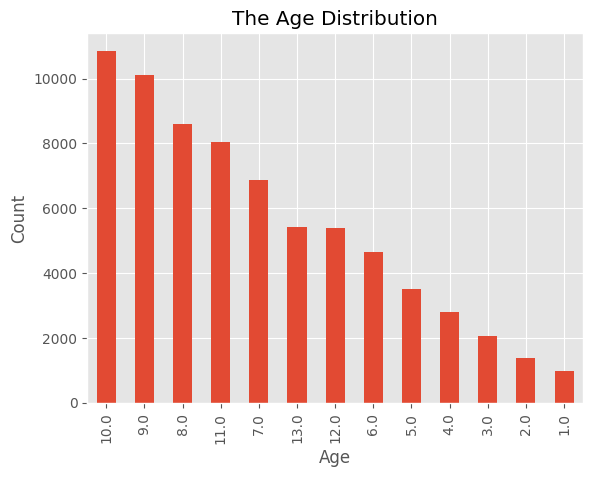

In [11]:
ax = df['Age'].value_counts().plot(kind='bar', title='The Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show()

Majority of the patient age group is around 10 years old.

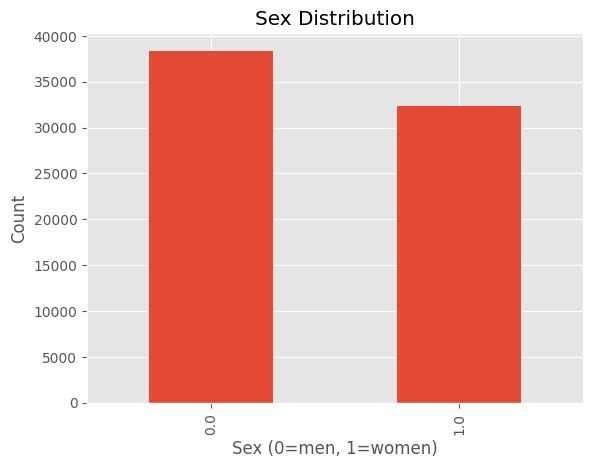

In [12]:
# gender distribution
ax = df['Sex'].value_counts().plot(kind='bar', title='Sex Distribution')
ax.set_xlabel('Sex (0=men, 1=women)')
ax.set_ylabel('Count')
plt.show()

The amount of men and women in the study are in the same order of magnitude. This suggest way bay be able to look at sex differences.

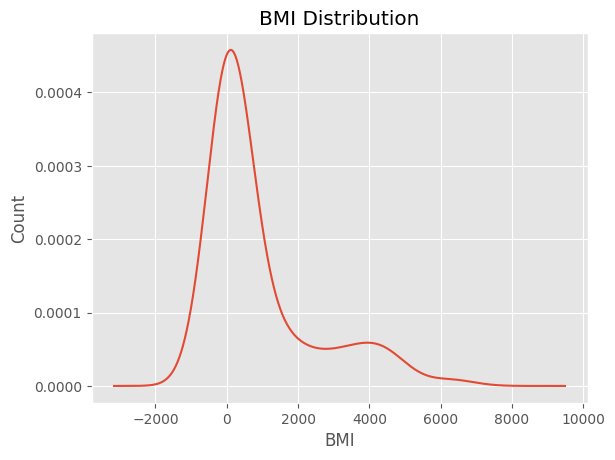

In [13]:
# BMI distribution
ax= df['BMI'].value_counts().plot(kind='kde', title='BMI Distribution')
ax.set_xlabel('BMI')
ax.set_ylabel('Count')
plt.show()


BMI heavevily right skekwed for some reason around zero. May need to explore that part of the data a bit more.

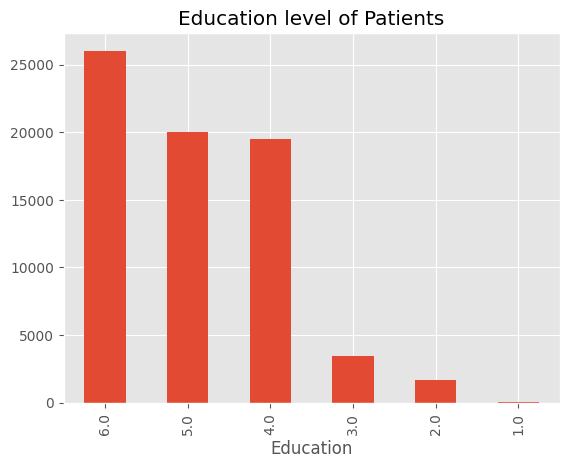

In [14]:
df['Education'].value_counts().plot(kind='bar', title='Education level of Patients')
ax.set_xlabel('Education')
ax.set_ylabel('Count')
plt.show()

The education data is also havily skewed.

### Bivariate Analysis

In [15]:
# get an idea of income distribution
# Seperate data into features and target now that we have chosen our features
temp_feat = df.drop(['Diabetes_binary'], axis=1).copy()
temp_feat.head()

,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,26.0,0.0,1.0,0.0,3.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,26.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,26.0,0.0,1.0,1.0,1.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,28.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,29.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,8.0,5.0,8.0


In [16]:
temp_y = df['Diabetes_binary'].copy()
temp_y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

## Feature Relationships

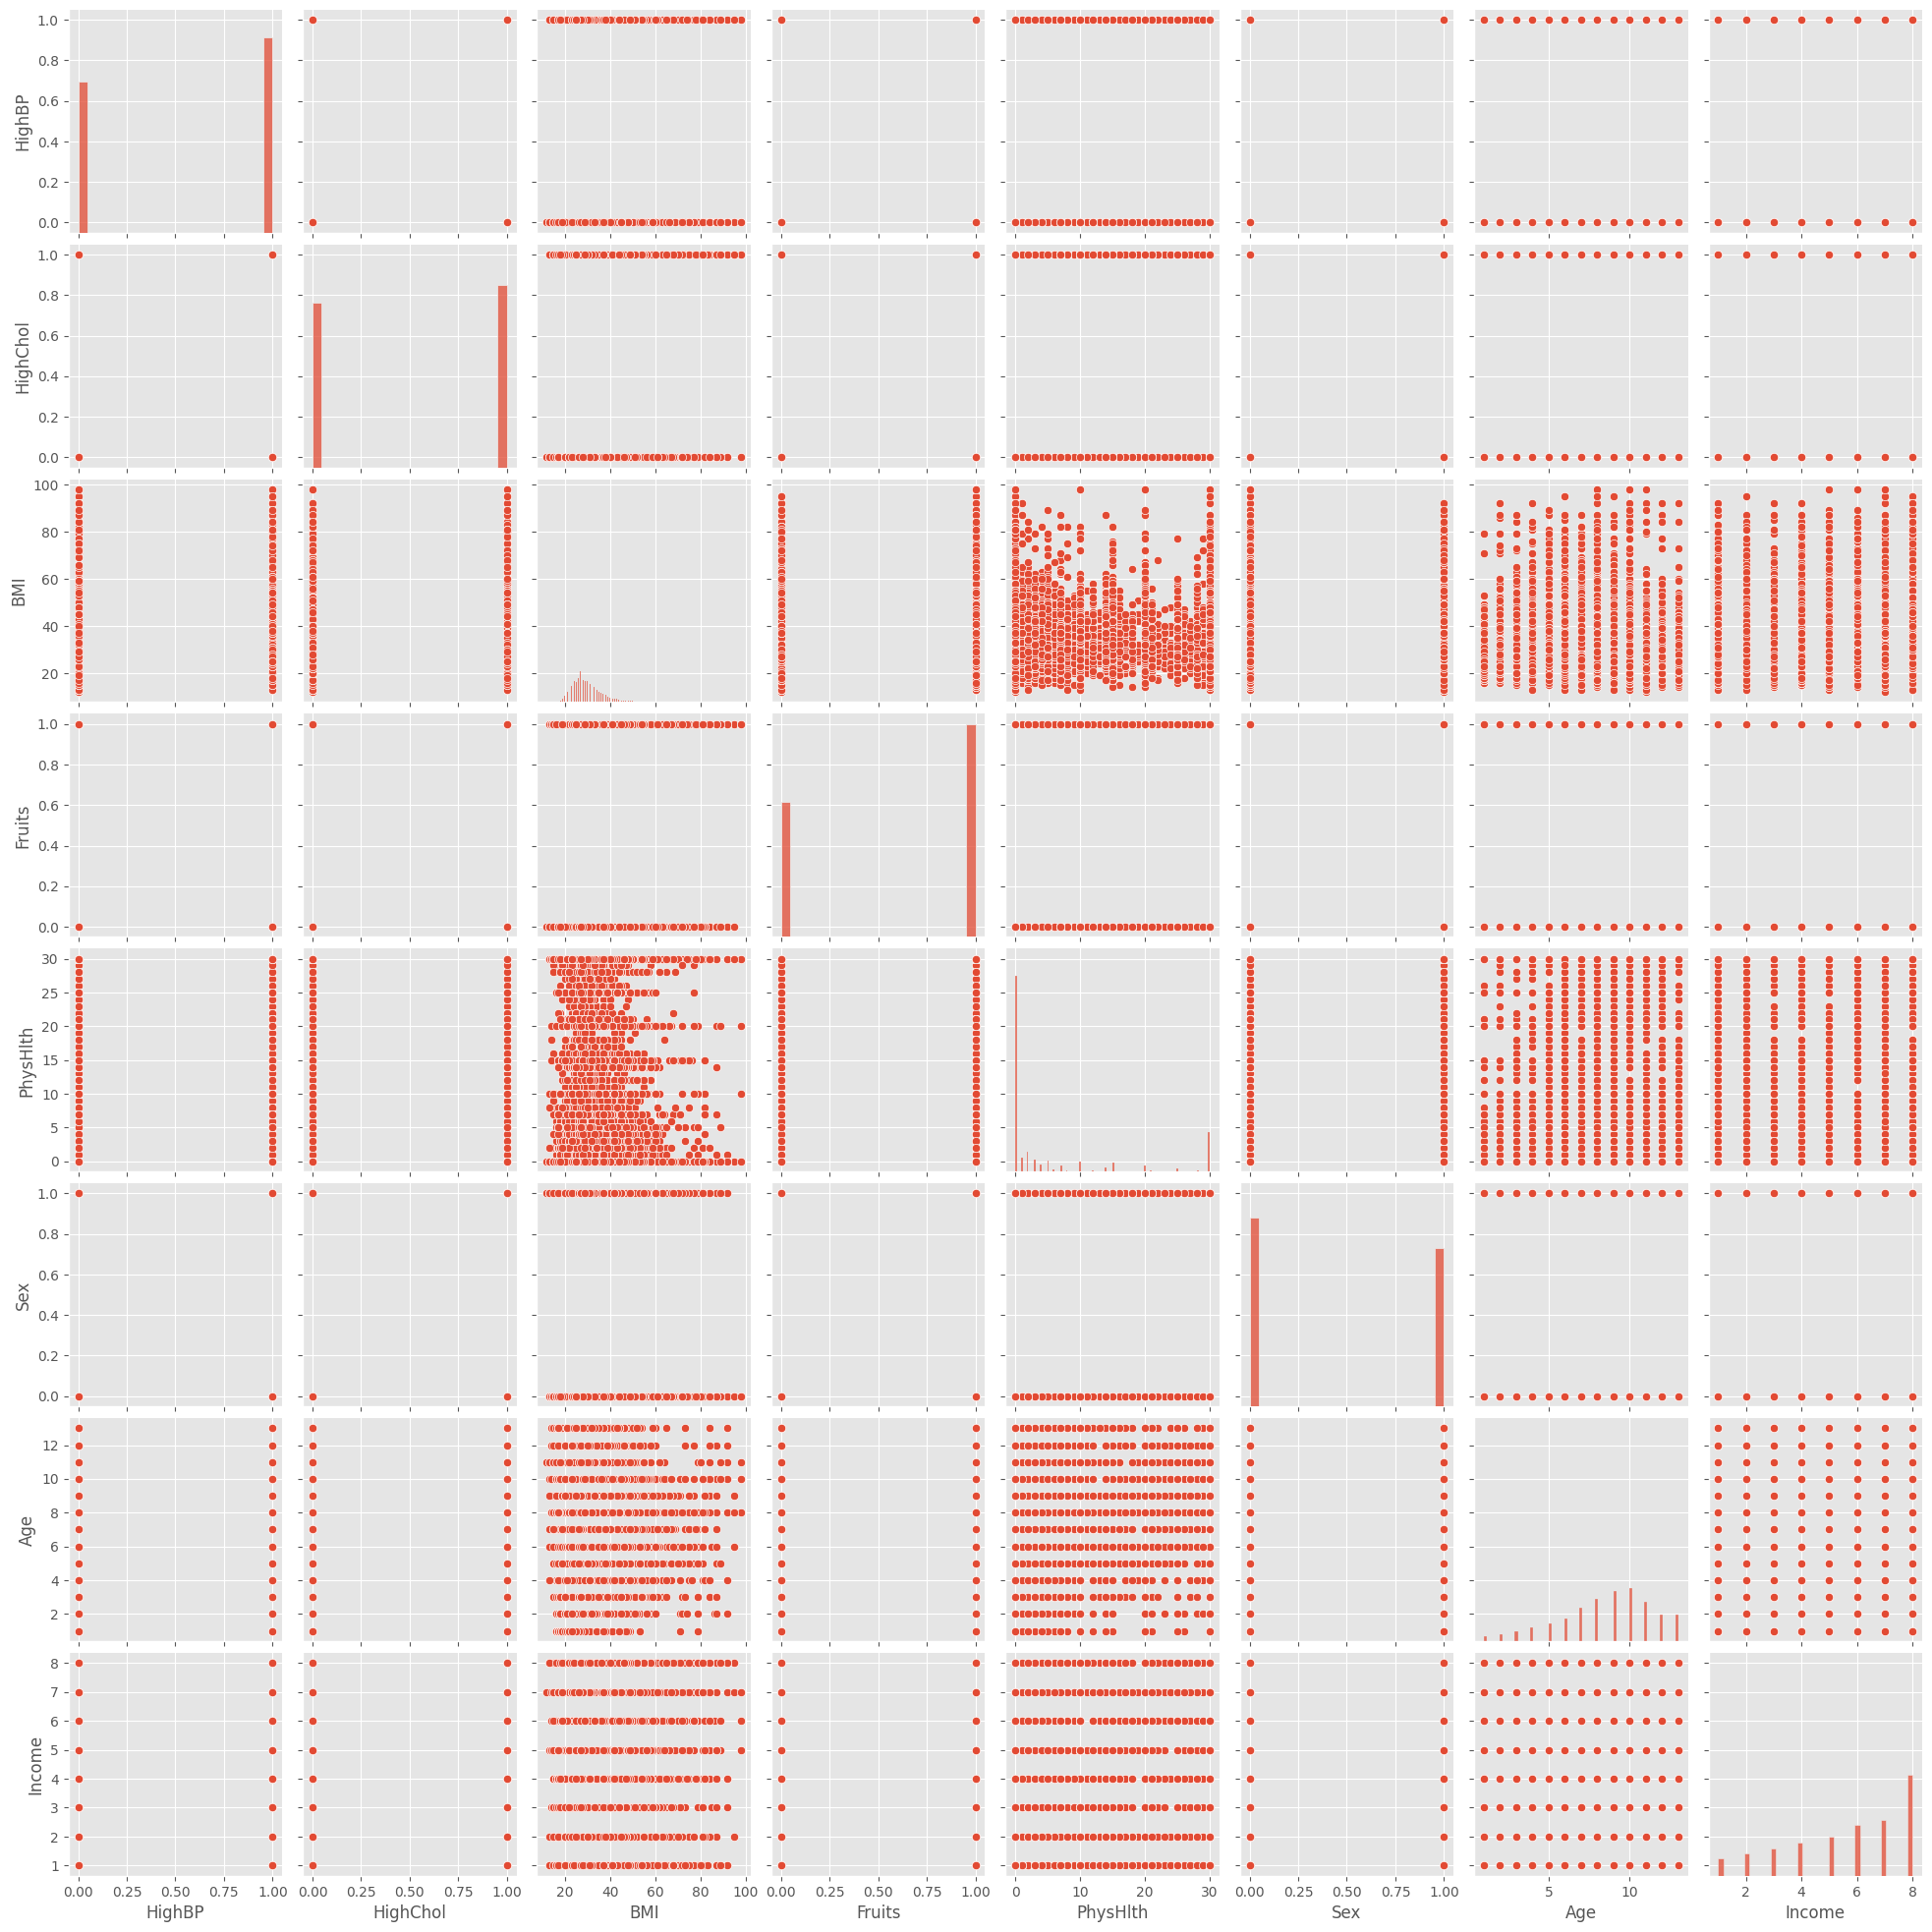

In [17]:
sns.pairplot(temp_feat, vars=['HighBP', 'HighChol', 'BMI',
              'Fruits','PhysHlth',  'Sex', 'Age', 'Income'])
plt.show()

In [18]:
# correlation matrix to determine relationship between variables
temp_feat.corr()

,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,1.000000,0.316515,0.241019,0.087438,-0.136102,-0.040852,0.320540,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.316515,1.000000,0.131309,0.093398,-0.090453,-0.047384,0.237778,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
BMI,0.241019,0.131309,1.000000,0.011551,-0.170936,-0.084505,0.267888,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.087438,0.093398,0.011551,1.000000,-0.079823,-0.074811,0.152416,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
PhysActivity,-0.136102,-0.090453,-0.170936,-0.079823,1.000000,0.133813,-0.273548,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.040852,-0.047384,-0.084505,-0.074811,0.133813,1.000000,-0.098687,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009
GenHlth,0.320540,0.237778,0.267888,0.152416,-0.273548,-0.098687,1.000000,0.552757,0.476639,-0.014555,0.155624,-0.285420,-0.382969
PhysHlth,0.173922,0.142610,0.161862,0.120698,-0.234500,-0.048572,0.552757,1.000000,0.487976,-0.045957,0.084852,-0.159317,-0.279326
DiffWalk,0.234784,0.162043,0.246094,0.119789,-0.276868,-0.050784,0.476639,0.487976,1.000000,-0.082248,0.195265,-0.202590,-0.343245
Sex,0.040819,0.017324,0.000827,0.112125,0.051753,-0.088723,-0.014555,-0.045957,-0.082248,1.000000,-0.002315,0.043564,0.159654


<Axes: >

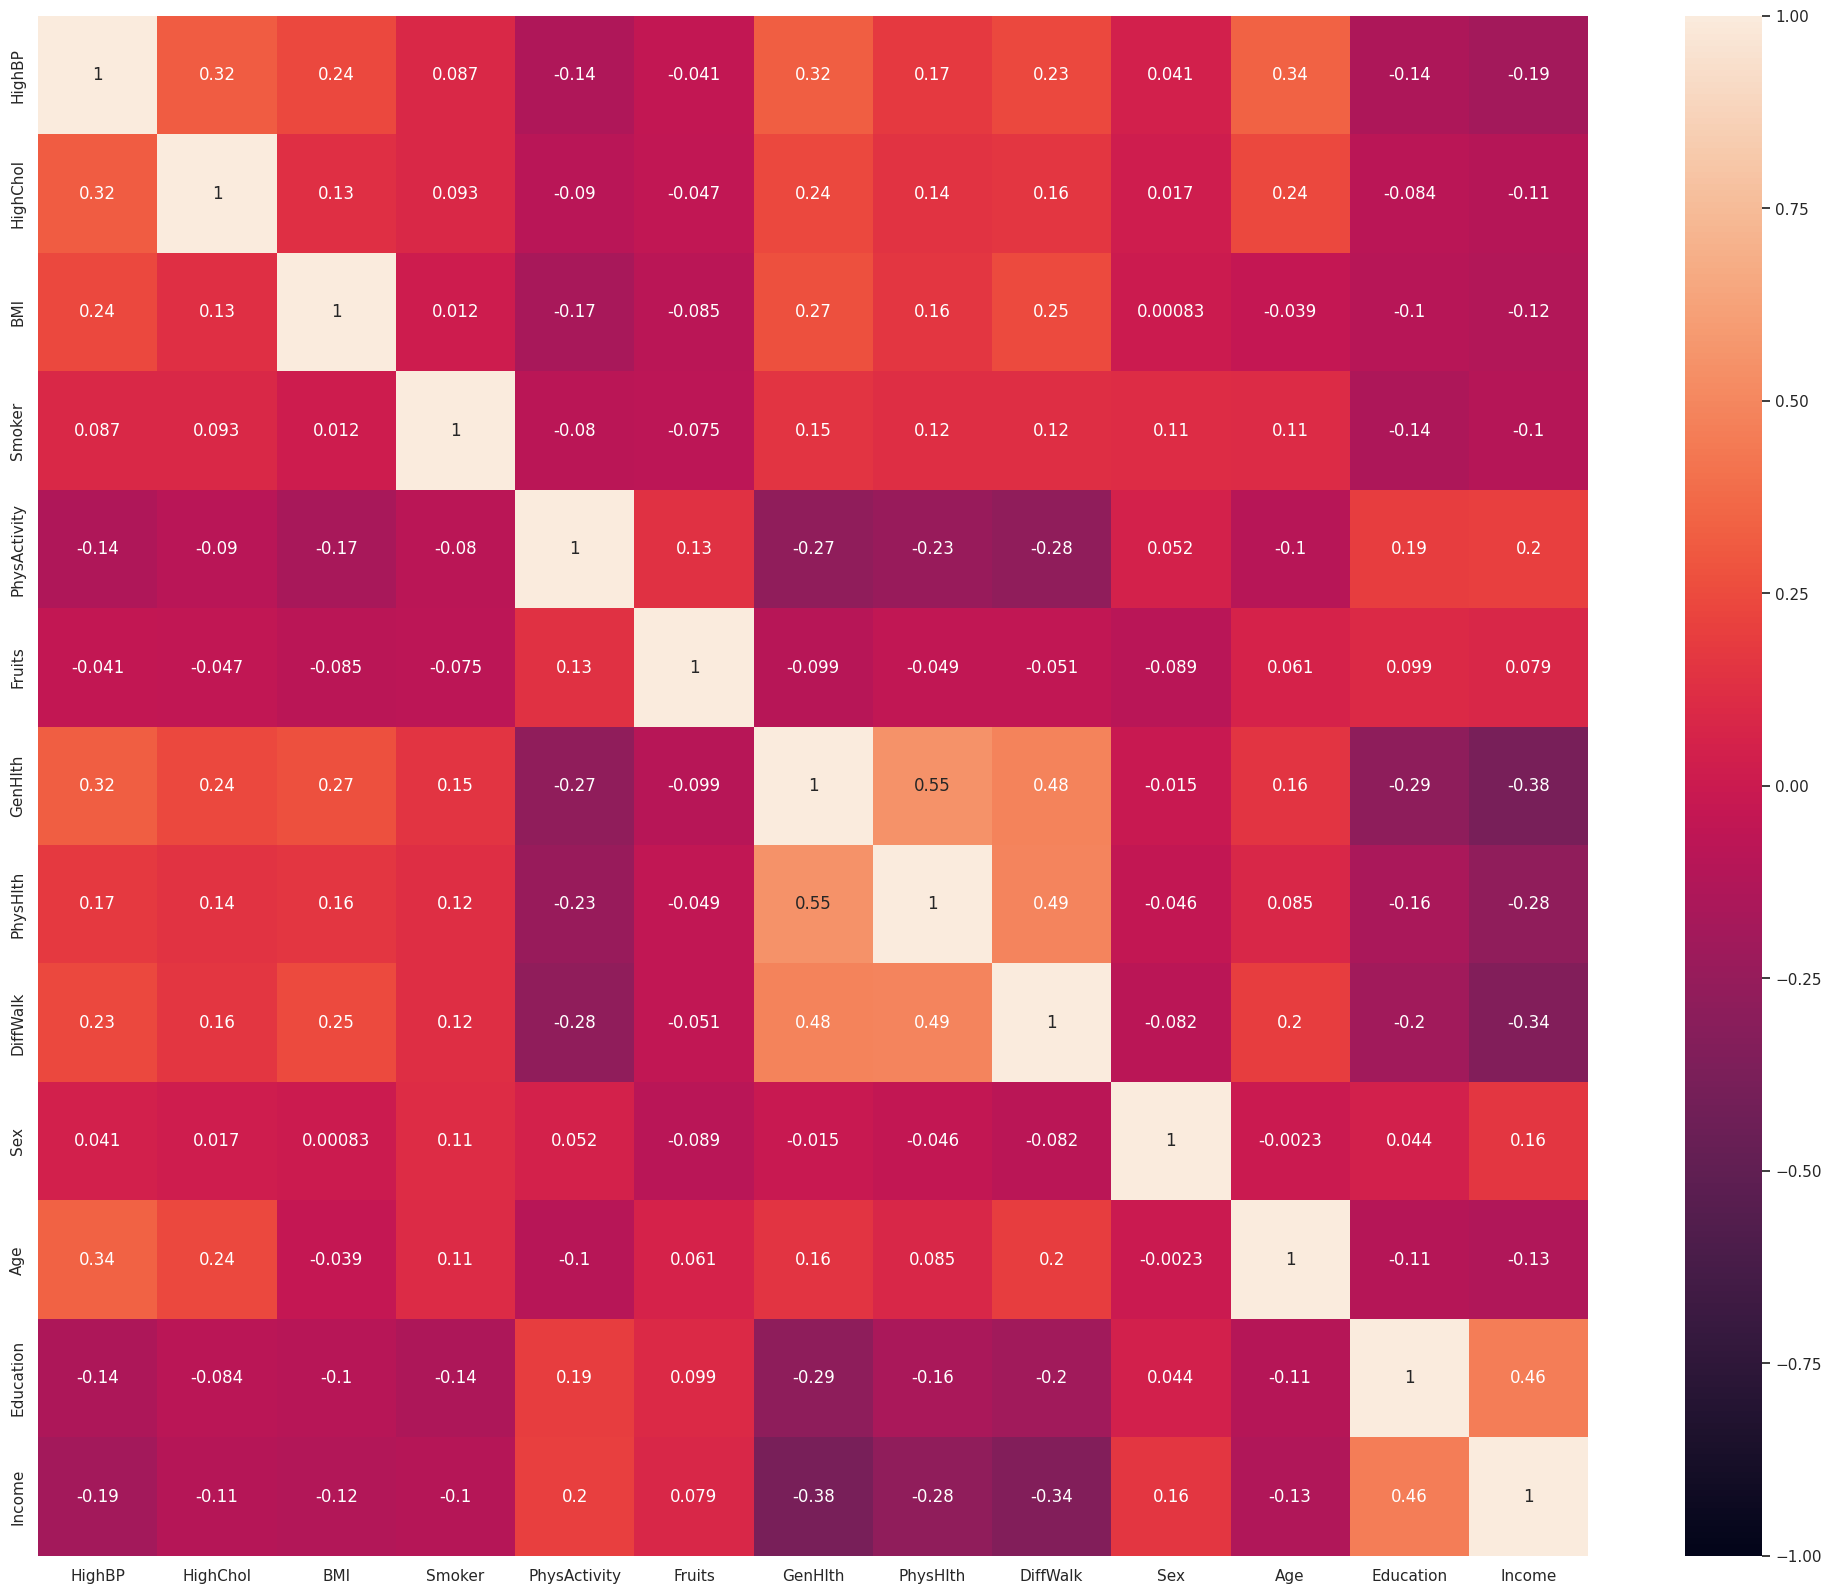

In [19]:
# correlation heatmap
sns.set(rc = {'figure.figsize':(25
                                , 20)})
sns.heatmap(temp_feat.corr(), annot=True, vmin = -1, vmax = 1)


No strong correlation is observed from the scatter plot.

Still investigate the ability to predict diabetes.

## Ask Questions about he Data

On average, compare the amounts of fruits patients with or without diabetes eat.

In [20]:
ax = df.groupby('Diabetes_binary').mean()
ax

,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,,,,,,,,,,,,,
0.0,0.374243,0.381288,27.769960,0.432326,0.775533,0.638149,2.383183,3.666355,0.134244,0.434872,7.789057,5.096390,6.186527
1.0,0.752674,0.670118,31.944011,0.518220,0.630538,0.585441,3.290981,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094


- Physical health may be a good indicator of whether a patient has diabetes or not based on the averages.
- It looks relatively even across sexes

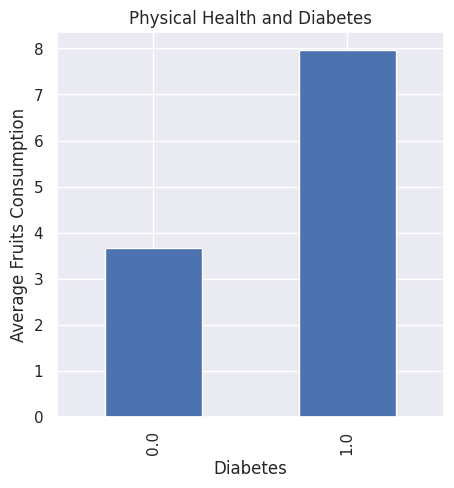

In [21]:
# Explore more the effects of physical health
ax = df.groupby('Diabetes_binary')['PhysHlth'].mean() \
    .plot(kind='bar', figsize=(5,5), title='Physical Health and Diabetes', 
          ylabel='Average Fruits Consumption', xlabel='Diabetes')
plt.show()

## Model Training using Sci-kit Learn

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error